In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# paquetes para el modelelado
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sklearn 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [4]:
data = pd.read_csv("datos.csv")

In [5]:
data.head()

,transaction_id,timestamp,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
0,99899e9e02c4b41fc442744220e6fa12f8d36b26f70027...,155270.0,12.00,-0.071330,-0.032900,0.109989,0.339889,-0.626131,-0.116853,1.220826,...,-0.168169,-1.054944,-1.603176,-0.616640,2.283078,0.373964,1.576543,-0.941557,-0.105280,0
1,d678605da2ed45d14c95228b2e6a0daa1c635c7c5d3f7c...,46054.0,208.89,0.057858,0.003669,0.076745,0.392782,0.458835,-0.279094,0.435257,...,-1.606923,-1.100937,0.597263,-1.228029,0.875399,0.260934,-0.558290,0.763729,0.011740,0
2,5f178ebbecf592c3ea98b5b26ff3547f8a40e88aa428d5...,167866.0,1.00,-0.002449,0.019520,-0.038565,0.400659,-1.214922,-0.177434,0.303247,...,1.044934,0.533274,-2.802382,0.570268,2.121604,-0.131120,1.603304,-0.032323,0.062465,0
3,455543a8012484e430efd18300186319bf8da376811333...,163539.0,15.00,-0.039202,-0.031762,-0.328682,-0.045094,0.606368,0.204822,0.014322,...,0.020468,-0.853713,-1.915028,-0.478400,2.161957,-1.117518,1.768693,-0.517470,-0.101639,0
4,d8637ef4c5c833fee92149b5b8ef2fad601196be9b7c89...,153872.0,0.01,-0.058206,-0.051926,0.653525,-0.387901,0.806301,0.227390,0.676840,...,-0.750013,-0.914675,-0.595874,-0.705751,2.026529,2.221984,0.744251,-0.768323,-0.166163,0


In [6]:
data[data['transaction_id'].duplicated(keep = False)]['transaction_id'].tolist()

['12019862d3ae28c22e8872bc680756529af41cc8dac3c32add03d21567e98a3d',
 'd4c08ffe5bf53cde213abf9debb6c094c857bea4933d7ad645ec90f168e21766',
 'f75c35a5b81b38e308ff4dead1dd12cd1d3653a88117aa0776716425bfdec0d5',
 'e7a755a2ebea3c9997b11202f32a854044fafcae052dc8104e2c527fe7c067f5',
 '4a469cca8debbabbac141a01cd21059241eba0f2c9f244e908d6a56fa4dda745',
 '39c51f34a6d94ad56a89ea50fdecf8dafe956ad972355760e19eee55ec4b2d47',
 '9b7999ccc7b640bf10d44a7ccf1182fcdc91060a39a97c9be9ed225811a862c4',
 'cf6a8a8b7aafcb06838f76c10b53e6c433d4ec8764babaddc5d08c29148196a9',
 '97fb5781b6f1caf330db6b875986164176738435fafe094c91fb00cb254ff753',
 'b99c7b634dd055153895f3df44c5cf663d129178087f8f7c7b8287d621186d7b',
 'a4de76f1d6b8bfc52cb110b0862d015dc32a8e9b165eaa2f4c96e386f943a4de',
 '10e5320e2a3c4eeaf6a04936e0ac114903e1b3030c0d113819315d49a600425e',
 'effe500be768224a6f2fc62229c8f339e9c92c4c0306a0c4c76a1f03c1b7128f',
 '4eca46d7a1a7adc05b08dc799b6aa393d82ba03bbbf136d5743aa44063dd864d',
 '9221fbe329055b8922d86cf9c8a318dc

In [7]:
data[data['transaction_id'] == 'e843dbaf818980350a609406946c2f6606cfe4d51b9a8cdb23aef96ec9f317fe']

,transaction_id,timestamp,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
6755,e843dbaf818980350a609406946c2f6606cfe4d51b9a8c...,50203.0,33.88,0.027127,0.040046,-0.350073,0.604137,0.633382,-0.026943,0.08184,...,-0.379409,1.534532,0.616673,0.187389,1.078308,-1.190247,-1.358576,0.358081,0.128148,0
279455,e843dbaf818980350a609406946c2f6606cfe4d51b9a8c...,50203.0,33.88,0.027127,0.040046,-0.350073,0.604137,0.633382,-0.026943,0.08184,...,-0.379409,1.534532,0.616673,0.187389,1.078308,-1.190247,-1.358576,0.358081,0.128148,0


In [8]:
data = data.drop_duplicates() 

In [9]:
data[data['transaction_id'].duplicated(keep = False)]['transaction_id'].tolist()

[]

In [10]:
# Comportamiento de las variables
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
amount,283726.0,88.472687,250.399437,0.000000,5.600000,22.000000,77.510000,25691.160000
variable_01,283726.0,0.000547,0.328027,-15.430084,-0.052818,0.011288,0.078276,33.847808
variable_02,283726.0,0.001763,0.395744,-22.565679,-0.070641,0.001479,0.091208,31.612198
variable_03,283726.0,0.000149,0.482053,-2.604551,-0.326763,-0.052172,0.240261,3.517346
variable_04,283726.0,-0.000232,0.521220,-10.295397,-0.317485,0.016278,0.350667,7.519589
variable_05,283726.0,0.000214,0.605627,-2.836627,-0.354453,0.041016,0.439738,4.584549
variable_06,283726.0,0.000198,0.623702,-44.807735,-0.161703,-0.011159,0.147748,22.528412
variable_07,283726.0,-0.000015,0.724550,-10.933144,-0.542700,0.006675,0.528245,10.503090
variable_08,283726.0,-0.000371,0.723909,-34.830382,-0.228305,-0.029441,0.186194,27.202839


In [11]:
data[data['is_fraud'] == 1]['amount'].describe().transpose()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: amount, dtype: float64

In [12]:
# Visualización de Amount
data = data[data['amount'] <= 2200]
is_fraude = data[data['is_fraud'] == 1]
not_fraude = data[data['is_fraud'] == 0]

Text(0, 0.5, 'Tiempo')

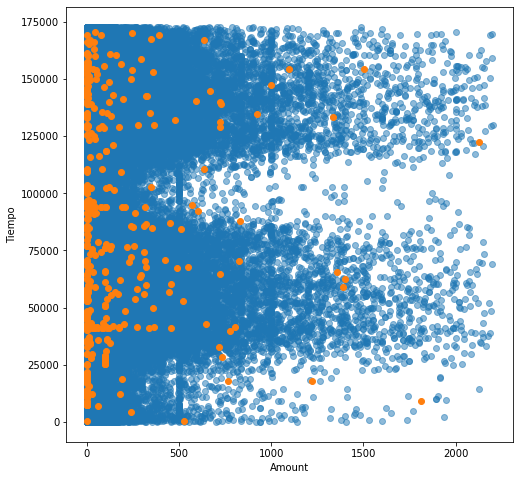

In [13]:
# Scatter plot entre fraude y no fraude
fig = plt.figure(figsize=(8,8))
plt.scatter(not_fraude.amount, not_fraude.timestamp.values, alpha = 0.5, label = 'No fraude')
plt.scatter(is_fraude.amount, is_fraude.timestamp.values, label = 'Es fraude')
plt.xlabel('Amount')
plt.ylabel('Tiempo')

<Figure size 1080x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

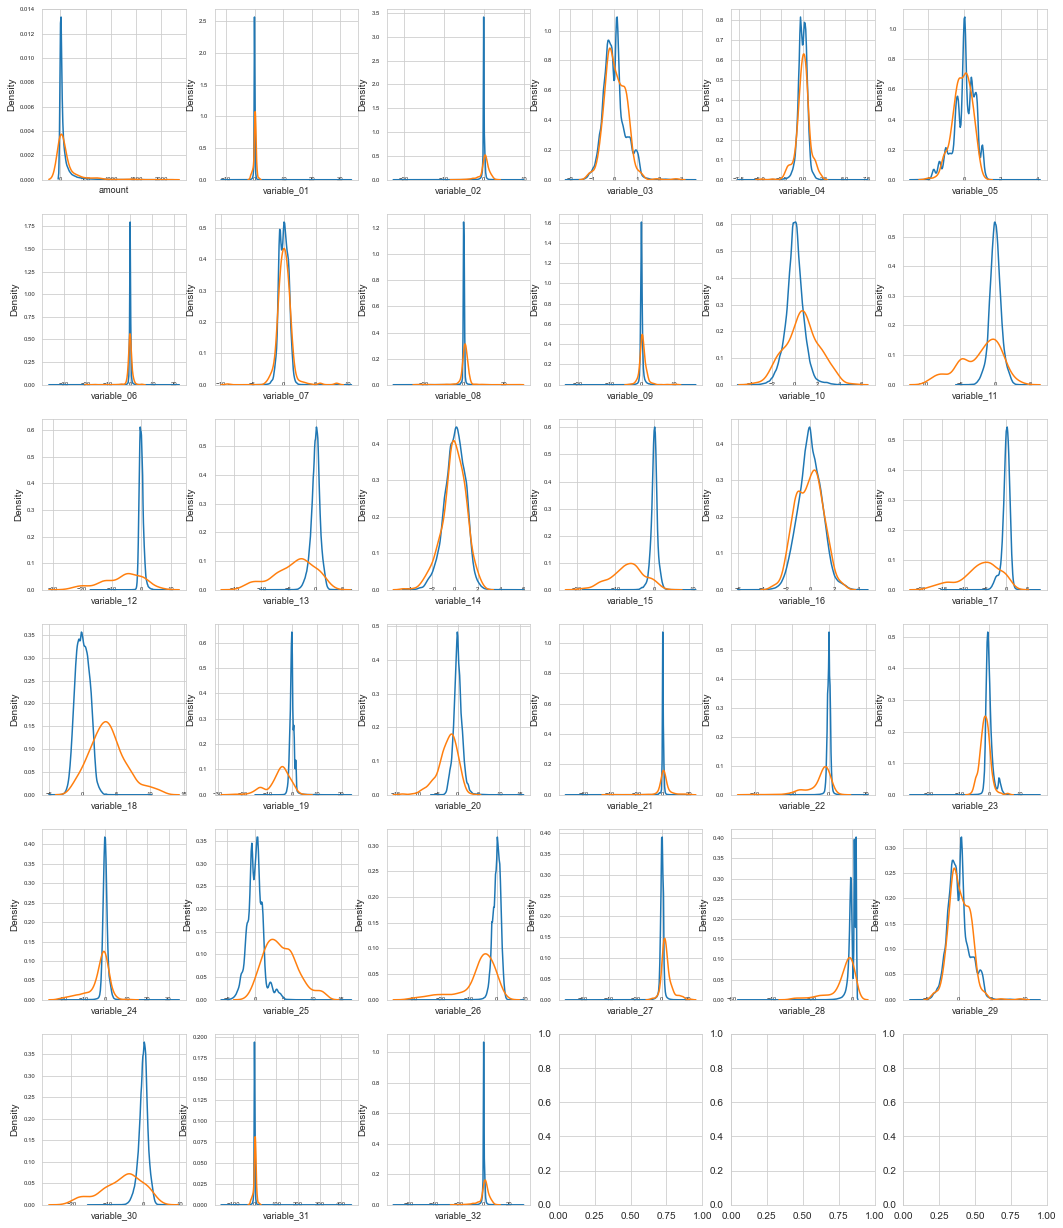

In [14]:
# Dropping zero-variance variables
data = data.drop(['transaction_id','timestamp'], axis = 1)

plt.figure(figsize=(15, 15))
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(6,6,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(6,6,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()
    
t0 = not_fraude
t1 = is_fraude
features = data.drop('is_fraud', axis=1)
plot_feature_distribution(t0, t1, '0', '1', features)

# Observación del desbalance

In [15]:
is_fraude.shape[0]

473

In [16]:
not_fraude.shape[0]

282685

In [17]:
473/(282685+473)*100

0.1670445475670827

In [18]:
data.shape[0]

283158

In [19]:
473/283158*100

0.1670445475670827

# Alta correlación entre variables

In [20]:
# Cálculo de la correlación
df_corr = data.corr() # Guardar la correlación de las variables
df_corr 

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
amount,1.000000,0.023284,-0.020844,0.009185,-0.017198,-0.006439,-0.063665,-0.020088,0.088904,0.289141,...,-0.300804,0.052369,-0.142141,-0.476357,-0.163107,0.009185,-0.050702,0.023284,-0.020844,0.009735
variable_01,0.023284,1.000000,0.027168,0.002097,0.002960,0.003465,-0.000172,0.007206,-0.017100,-0.040157,...,-0.024394,-0.000137,-0.005008,0.008256,-0.008171,0.002097,0.004476,1.000000,0.027168,0.009942
variable_02,-0.020844,0.027168,1.000000,-0.008156,0.001181,-0.008448,0.041326,-0.002257,0.023607,0.098467,...,0.048479,-0.001259,0.010570,0.008653,-0.003222,-0.008156,-0.019196,0.027168,1.000000,0.022755
variable_03,0.009185,0.002097,-0.008156,1.000000,-0.002766,0.000464,-0.005567,-0.004727,0.003571,0.014555,...,0.001651,0.002263,-0.001154,-0.006580,-0.002961,1.000000,-0.001462,0.002097,-0.008156,0.004249
variable_04,-0.017198,0.002960,0.001181,-0.002766,1.000000,0.002467,-0.062206,-0.010787,0.004735,0.016748,...,-0.003220,0.004871,-0.006433,-0.018790,-0.006434,-0.002766,0.000882,0.002960,0.001181,0.003146
variable_05,-0.006439,0.003465,-0.008448,0.000464,0.002467,1.000000,0.016501,0.001312,0.003251,0.007046,...,0.005795,-0.000975,0.002723,0.003396,0.001497,0.000464,-0.002088,0.003465,-0.008448,-0.007205
variable_06,-0.063665,-0.000172,0.041326,-0.005567,-0.062206,0.016501,1.000000,-0.029743,-0.010935,-0.029762,...,-0.009406,0.009652,-0.019375,-0.034473,-0.015404,-0.005567,0.007925,-0.000172,0.041326,-0.007325
variable_07,-0.020088,0.007206,-0.002257,-0.004727,-0.010787,0.001312,-0.029743,1.000000,0.022466,0.036594,...,-0.008056,0.007828,-0.009722,-0.028912,-0.014219,-0.004727,-0.000748,0.007206,-0.002257,0.004793
variable_08,0.088904,-0.017100,0.023607,0.003571,0.004735,0.003251,-0.010935,0.022466,1.000000,-0.075877,...,-0.003452,-0.008372,0.009148,0.027429,0.012528,0.003571,0.008421,-0.017100,0.023607,0.026889
variable_09,0.289141,-0.040157,0.098467,0.014555,0.016748,0.007046,-0.029762,0.036594,-0.075877,1.000000,...,-0.007714,-0.029611,0.022225,0.124028,0.036999,0.014555,0.012795,-0.040157,0.098467,0.024906


In [21]:
# Múltiple índice
serie_corr = df_corr.unstack().sort_values(ascending = False)
serie_corr

variable_13  variable_30    1.000000
variable_30  variable_13    1.000000
variable_02  variable_32    1.000000
variable_32  variable_02    1.000000
variable_10  variable_10    1.000000
                              ...   
variable_24  amount        -0.300804
variable_12  is_fraud      -0.313798
is_fraud     variable_12   -0.313798
amount       variable_27   -0.476357
variable_27  amount        -0.476357
Length: 1156, dtype: float64

In [22]:
# Criterio de alta correlación (> 0.9)
serie_2 = serie_corr.where((serie_corr.abs() > 0.9) & (serie_corr.abs() < 1)).dropna()
serie_2

variable_01  variable_31    1.0
variable_31  variable_01    1.0
variable_03  variable_29    1.0
variable_29  variable_03    1.0
dtype: float64

In [23]:
data = data.drop(['variable_31','variable_29'], axis = 1)

In [24]:
data

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,...,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_30,variable_32,is_fraud
0,12.00,-0.071330,-0.032900,0.109989,0.339889,-0.626131,-0.116853,1.220826,0.394041,0.051705,...,-0.251412,-0.989219,-0.168169,-1.054944,-1.603176,-0.616640,2.283078,1.576543,-0.105280,0
1,208.89,0.057858,0.003669,0.076745,0.392782,0.458835,-0.279094,0.435257,0.230350,0.292049,...,-0.439827,-0.863551,-1.606923,-1.100937,0.597263,-1.228029,0.875399,-0.558290,0.011740,0
2,1.00,-0.002449,0.019520,-0.038565,0.400659,-1.214922,-0.177434,0.303247,0.030461,-0.112687,...,0.362076,-1.215083,1.044934,0.533274,-2.802382,0.570268,2.121604,1.603304,0.062465,0
3,15.00,-0.039202,-0.031762,-0.328682,-0.045094,0.606368,0.204822,0.014322,0.013439,0.016800,...,-0.300838,-0.787018,0.020468,-0.853713,-1.915028,-0.478400,2.161957,1.768693,-0.101639,0
4,0.01,-0.058206,-0.051926,0.653525,-0.387901,0.806301,0.227390,0.676840,0.209482,-0.206405,...,-0.854064,-0.347373,-0.750013,-0.914675,-0.595874,-0.705751,2.026529,0.744251,-0.166163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,20.95,-0.069132,0.188023,-0.316651,0.128033,-0.322301,-0.043339,0.201194,0.120479,0.149040,...,-0.461203,0.675453,-0.113343,0.775532,1.775175,0.739190,-1.213954,-0.185092,0.601673,0
284803,270.00,0.069018,-0.015243,-0.050520,0.210760,0.418322,-0.230815,-0.086388,0.123620,0.354605,...,-0.407734,-0.870850,-1.751646,-1.033579,0.546490,-1.471844,0.753390,-0.419553,-0.048778,0
284804,28.32,-0.265292,-1.056264,0.979528,0.782035,0.692832,-0.388238,0.948950,0.138786,-0.239283,...,0.708199,-0.328988,0.861190,0.150386,0.427417,0.641439,-1.906318,-0.207218,-3.380046,0
284805,256.58,0.093611,0.051865,-0.410531,0.685550,-0.965304,0.269152,0.990574,0.476423,0.581536,...,-0.264151,2.972262,0.807602,-0.016152,2.330076,-1.272419,-2.035372,-0.116800,0.165967,0


# Varianza cero

In [25]:
df_var = pd.DataFrame({'Variable':np.array(data.var().index),'Variance':data.var().values})
df_var[df_var['Variance']<=0.1] # 0.1 es un criterio propio

,Variable,Variance
31,is_fraud,0.001668


## Subsampling (entrenar con datos balanceados y test con datos desbalanceados/realidad)

In [26]:
is_fraude = is_fraude.drop(['transaction_id','timestamp'], axis = 1)
not_fraude = not_fraude.drop(['transaction_id','timestamp'], axis = 1)

In [56]:
not_fraude

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
0,12.00,-0.071330,-0.032900,0.109989,0.339889,-0.626131,-0.116853,1.220826,0.394041,0.051705,...,-0.168169,-1.054944,-1.603176,-0.616640,2.283078,0.373964,1.576543,-0.941557,-0.105280,0
1,208.89,0.057858,0.003669,0.076745,0.392782,0.458835,-0.279094,0.435257,0.230350,0.292049,...,-1.606923,-1.100937,0.597263,-1.228029,0.875399,0.260934,-0.558290,0.763729,0.011740,0
2,1.00,-0.002449,0.019520,-0.038565,0.400659,-1.214922,-0.177434,0.303247,0.030461,-0.112687,...,1.044934,0.533274,-2.802382,0.570268,2.121604,-0.131120,1.603304,-0.032323,0.062465,0
3,15.00,-0.039202,-0.031762,-0.328682,-0.045094,0.606368,0.204822,0.014322,0.013439,0.016800,...,0.020468,-0.853713,-1.915028,-0.478400,2.161957,-1.117518,1.768693,-0.517470,-0.101639,0
4,0.01,-0.058206,-0.051926,0.653525,-0.387901,0.806301,0.227390,0.676840,0.209482,-0.206405,...,-0.750013,-0.914675,-0.595874,-0.705751,2.026529,2.221984,0.744251,-0.768323,-0.166163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,20.95,-0.069132,0.188023,-0.316651,0.128033,-0.322301,-0.043339,0.201194,0.120479,0.149040,...,-0.113343,0.775532,1.775175,0.739190,-1.213954,-1.076613,-0.185092,-0.912538,0.601673,0
284803,270.00,0.069018,-0.015243,-0.050520,0.210760,0.418322,-0.230815,-0.086388,0.123620,0.354605,...,-1.751646,-1.033579,0.546490,-1.471844,0.753390,-0.171768,-0.419553,0.911038,-0.048778,0
284804,28.32,-0.265292,-1.056264,0.979528,0.782035,0.692832,-0.388238,0.948950,0.138786,-0.239283,...,0.861190,0.150386,0.427417,0.641439,-1.906318,3.330394,-0.207218,-3.501856,-3.380046,0
284805,256.58,0.093611,0.051865,-0.410531,0.685550,-0.965304,0.269152,0.990574,0.476423,0.581536,...,0.807602,-0.016152,2.330076,-1.272419,-2.035372,-1.395804,-0.116800,1.235671,0.165967,0


In [27]:
# Subsampling de los que no son fraude
not_fraude_samplin = (not_fraude.sample(random_state= 1, n = 500))
not_fraude_samplin

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
211840,100.00,-0.031559,-0.002996,-0.069476,-0.279675,0.005414,0.075061,1.108234,0.446991,0.094087,...,-1.465464,-0.732884,-0.433727,-1.328678,1.980380,-0.236220,2.055221,-0.416580,-0.009587,0
13105,74.87,0.018128,0.006063,0.006959,0.521327,-0.402174,-0.153342,0.006265,-0.007450,0.081542,...,-0.346610,-1.535950,-0.210996,-0.455734,1.187646,0.023660,-0.977627,0.239285,0.019402,0
62738,61.00,-0.013799,0.013150,-0.514471,-0.565467,-0.058027,0.324954,-0.201691,-0.025208,0.098728,...,-1.045816,-0.667686,-0.791317,-0.878566,2.001624,-1.749201,2.752329,-0.182149,0.042079,0
275755,97.01,-0.015550,-0.032993,-0.116280,-0.080611,0.093046,0.090101,-0.538035,-0.178248,0.005241,...,0.439310,0.214281,-2.006541,-0.324336,1.842656,-0.395351,0.469817,-0.205257,-0.105577,0
237839,2.28,0.088079,0.217248,0.108329,-0.563135,-0.109505,0.097918,-0.818867,-0.417907,-0.157701,...,0.418934,-0.380241,0.413750,0.900715,0.041436,0.368318,-0.198633,1.162647,0.695194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203907,11.85,-0.054410,0.068319,-0.979028,-0.789684,-0.384490,-0.014621,0.617577,0.026212,-0.292929,...,-0.096529,-1.807296,2.013307,0.001643,-0.400276,-3.328695,-1.051365,-0.718213,0.218621,0
131456,10.00,0.190681,0.143459,-0.242452,-0.131934,-0.042216,-0.329316,0.931018,0.218385,-0.099547,...,1.039553,-0.378406,0.177717,1.165373,-0.284514,-0.824336,0.464566,2.516985,0.459068,0
188547,27.54,-0.075613,-0.047153,-0.273017,-0.036001,-0.397714,0.138607,0.147876,0.066128,-0.039671,...,-0.368677,-0.979313,-1.458156,-0.798159,2.161576,-0.928258,1.320904,-0.998088,-0.150889,0
53982,124.80,-0.086191,-0.146218,1.016335,0.503989,-0.404806,-0.267270,0.337339,-0.010300,-0.363171,...,0.329158,-0.524932,-2.649092,-0.738478,2.022940,3.455538,-2.933207,-1.137725,-0.467898,0


In [28]:
df_sam = is_fraude.append(not_fraude_samplin)
df_sam = df_sam.sort_index()
df_sam

,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,...,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
19,237.26,0.082337,-0.054988,0.044033,0.803110,0.215683,0.335821,1.187013,0.220526,-1.928527,...,-0.661836,1.449792,-5.774530,-2.714268,-6.682832,0.149713,-3.453894,1.086850,-0.175960,1
25,1.00,-0.060282,0.027735,-0.398828,0.366624,0.726212,0.020675,0.844627,0.269765,-0.180370,...,2.463072,-0.842316,-2.752041,-0.326668,2.055797,-1.356014,-0.557943,-0.795724,0.088752,0
36,30.31,-0.711066,-2.498300,-0.167808,-0.743909,0.519952,-0.412861,-0.266162,2.761157,-1.376298,...,-11.731476,10.648505,-18.256576,7.352148,-13.086519,-0.570548,-14.750615,-9.386073,-7.994561,1
231,68.27,0.020140,0.008481,-0.252859,0.895708,-0.964919,-0.344181,-0.056405,-0.010592,0.116295,...,0.466527,0.828980,-0.333322,0.220078,1.220397,-0.859721,0.605006,0.265846,0.027139,0
260,19.86,-0.048012,-0.028180,0.625354,-0.132768,0.086367,0.080382,0.617184,0.153454,-0.134839,...,-0.213978,0.231383,-0.739886,-0.511472,2.023610,2.126204,0.673964,-0.633757,-0.090177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283533,3.79,0.054254,0.012948,-0.118941,0.350182,0.167608,0.077614,-0.800852,-0.423554,-0.217358,...,0.175739,3.170258,0.394684,0.898474,1.088375,-0.404399,0.503463,0.716156,0.041433,1
283569,427.30,-0.013306,-0.107814,0.220091,0.186845,-1.358687,-0.514661,0.231098,0.303704,0.668385,...,0.058030,0.199738,-2.100818,-1.697827,1.276542,0.748311,-0.096009,-0.175636,-0.345006,0
283985,1.00,0.359492,1.505516,-0.165797,-0.405520,-0.446891,-1.211123,0.175331,1.177852,0.017500,...,-1.698320,5.159401,-6.312782,0.577610,-5.753852,-0.563711,-11.347564,4.745295,4.817651,1
284019,9.99,0.117633,-0.004196,0.207612,-0.093963,-0.351566,-0.002297,-0.678166,-0.127573,0.117771,...,1.518953,-0.660703,0.848264,-0.097347,-1.033786,0.705880,0.239920,1.552757,-0.013427,0


###  Split de datos (cálculo de train y test)

In [29]:
y = df_sam['is_fraud']# Variariable salida flag 
X = df_sam.drop(['is_fraud'],axis =1)# El conjuntos de variables o features

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [31]:
X_train.shape[0]

778

In [43]:
# Test es balanceado y no muestra la realidad adionar todo lo se no fraude que no está en el sampling
X_test.shape[0]

195

In [ ]:
# Adionar todo lo se no fraude que no está en el sampling


# Modelado

In [73]:
from pandas import MultiIndex, Int64Index

from sklearn.inspection import permutation_importance
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Validación cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import shap

# Optimización de hiperparámetros
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

#### optimización Bayeana de los hiperparámetros

In [38]:
# Definición de grid
# Rangos de los hiperparámetros
space = {'max_depth': hp.quniform('max_depth', 3,18,1), #desde 3 hasta 18 con saltos de 1
         'gamma': hp.uniform('gamma',1,9),
         'reg_alpha': hp.quniform('reg_alpha',40,180,1),
         'reg_lambda': hp.uniform('reg_lambda', 0,1),
         'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
         'min_child_weight': hp.quniform('min_child_weight',0,10,1),
         'n_estimators': 500,
         'seed': 0
        }

In [39]:
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x7fc545cb9c90>,
 'gamma': <hyperopt.pyll.base.Apply at 0x7fc545cb9e10>,
 'reg_alpha': <hyperopt.pyll.base.Apply at 0x7fc545cb9fd0>,
 'reg_lambda': <hyperopt.pyll.base.Apply at 0x7fc545cb7190>,
 'colsample_bytree': <hyperopt.pyll.base.Apply at 0x7fc545cb7310>,
 'min_child_weight': <hyperopt.pyll.base.Apply at 0x7fc545cb74d0>,
 'n_estimators': 500,
 'seed': 0}

hp.choice(label,options): lista

hp.randint(label,upper): valor random entre o upper

hp.uniform(label,low, high): valor uniforme entre low y high

hp.quniform(label,low, high, q): round(uniform_(low, high)/q)* q

hp.nomal(label,mean, std): con distribución normal

In [44]:
# Cambiar la métrica por el ROC-AUC
# Definición de la función objetivo
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], 
                    max_depth = int(space['max_depth']), 
                    gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),
                    min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [47]:
# Algoritmo de optimización
trials = Trials()

best_hyperparams = fmin(fn = objective, # función objetivo
                       space = space, # espacio donde se definen los hiperparámetros
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials= trials
                       )

SCORE:                                                                          
0.9076923076923077                                                              
SCORE:                                                                          
0.9076923076923077                                                              
SCORE:                                                                          
0.517948717948718                                                               
SCORE:                                                                          
0.9076923076923077                                                              
SCORE:                                                                          
0.517948717948718                                                               
SCORE:                                                                          
0.8666666666666667                                                              
SCORE:                      

0.9076923076923077                                                              
SCORE:                                                                          
0.8615384615384616                                                              
SCORE:                                                                          
0.9076923076923077                                                              
SCORE:                                                                          
0.9076923076923077                                                              
SCORE:                                                                          
0.9076923076923077                                                              
SCORE:                                                                          
0.8871794871794871                                                              
SCORE:                                                                          
0.9076923076923077          

In [48]:
# Imprimir resultados de los hyperparámetros
print('Los mejores hiperparámetros:', '\n')
print(best_hyperparams)

Los mejores hiperparámetros: 

{'colsample_bytree': 0.9014033682677601, 'gamma': 7.151565417023671, 'max_depth': 10.0, 'min_child_weight': 9.0, 'reg_alpha': 65.0, 'reg_lambda': 0.6744818353061143}


In [50]:
# Final model
xgb_model = XGBClassifier(n_stimators = 500,
                         max_depth = int(best_hyperparams['max_depth']),
                         gamma = best_hyperparams['gamma'],
                         reg_alpha = int(best_hyperparams['reg_alpha']),
                         min_child_weight=int(best_hyperparams['min_child_weight']),
                         colsample_bytree=int(best_hyperparams['colsample_bytree']),
                         scale_pos_weight = 1,  # peso para clases desbalanceadas (1 porque esta balanceado)
                         seed = 27)

In [ ]:
# Validación cruzada del modelo
KFold 

In [51]:
# Entrenamiento del model
xgb_model.fit(X_train, y_train)

[19:42:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_stimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=7.151565417023671, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
              max_leaves=0, min_child_weight=9, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              n_stimators=500, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=65, ...)

In [56]:
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [55]:
predictions

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

In [ ]:
# Score de probabilidad
predict proba

In [57]:
# Reporte de clasificación
print(classification_report(y_test,predictions)) 
# y_test la salida real en el test y prediciones son las salidas que predice el modelo

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       101
           1       1.00      0.83      0.91        94

    accuracy                           0.92       195
   macro avg       0.93      0.91      0.92       195
weighted avg       0.93      0.92      0.92       195



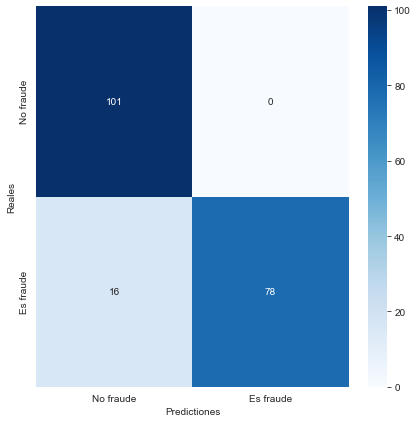

In [66]:
array = confusion_matrix(y_test, predictions)
df = pd.DataFrame(array, index = ['No fraude','Es fraude'], columns =['No fraude','Es fraude'])
plt.figure(figsize = (7,7))
sns.heatmap(df, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predictiones')
plt.ylabel('Reales')
plt.show()

In [68]:
# CURVA ROCK
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [70]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.9148936170212766

In [71]:
# Visualización de la curva ROC

### Importancia de los predictores

#### Importancia por Gini (pureza de los nodos)

In [74]:
xgb_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04414831, 0.        , 0.        , 0.39911294, 0.11323111,
       0.        , 0.        , 0.04159131, 0.        , 0.        ,
       0.07418453, 0.24207482, 0.        , 0.        , 0.        ,
       0.08565701, 0.        , 0.        ], dtype=float32)

In [77]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
label = np.concatenate([numeric_cols])
label

array(['amount', 'variable_01', 'variable_02', 'variable_03',
       'variable_04', 'variable_05', 'variable_06', 'variable_07',
       'variable_08', 'variable_09', 'variable_10', 'variable_11',
       'variable_12', 'variable_13', 'variable_14', 'variable_15',
       'variable_16', 'variable_17', 'variable_18', 'variable_19',
       'variable_20', 'variable_21', 'variable_22', 'variable_23',
       'variable_24', 'variable_25', 'variable_26', 'variable_27',
       'variable_28', 'variable_29', 'variable_30', 'variable_31',
       'variable_32'], dtype='<U11')

In [80]:
df_importance_gini = pd.DataFrame({'predictor': label,
                                 'importancia': xgb_model.feature_importances_ })
df_importance_gini[df_importance_gini['importancia']>0]

,predictor,importancia
15,variable_15,0.044148
18,variable_18,0.399113
19,variable_19,0.113231
22,variable_22,0.041591
25,variable_25,0.074185
26,variable_26,0.242075
30,variable_30,0.085657


#### Importancia por permutación

In [81]:
perm_importance = permutation_importance(xgb_model,X_test, y_test) # ojo test desbalanceado

In [82]:
perm_importance

{'importances_mean': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00820513,  0.        ,  0.        ,  0.03179487,  0.00410256,
         0.        ,  0.        ,  0.00307692,  0.        ,  0.        ,
         0.00512821,  0.00820513,  0.        ,  0.        ,  0.        ,
        -0.00102564,  0.        ,  0.        ]),
 'importances_std': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00410256, 0.        , 0.        , 0.01500383, 0.0038376 ,
        0.        , 0.        , 0.0025123 , 0.        , 0.        ,
        0.00561767, 0.00522976, 0.        , 0.        , 0.        ,
        0.0038376 , 0.        , 0.        ]),
 'importances': arra

In [84]:
df_importance_permut = pd.DataFrame({'predictor': label,
                                 'importancia': perm_importance.importances_mean})

In [86]:
df_importance_permut[df_importance_permut['importancia']!=0]

,predictor,importancia
15,variable_15,0.008205
18,variable_18,0.031795
19,variable_19,0.004103
22,variable_22,0.003077
25,variable_25,0.005128
26,variable_26,0.008205
30,variable_30,-0.001026


In [87]:
# Se puede hacer una matriz de correlación y analizar los resultados de la importancia por permutación

#### Importancia por Shap

In [88]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

In [90]:
shap_values

array([[ 0.        ,  0.        ,  0.        , ..., -0.07874264,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.07874264,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.07874264,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.12888713,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.12888713,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.12888713,
         0.        ,  0.        ]], dtype=float32)

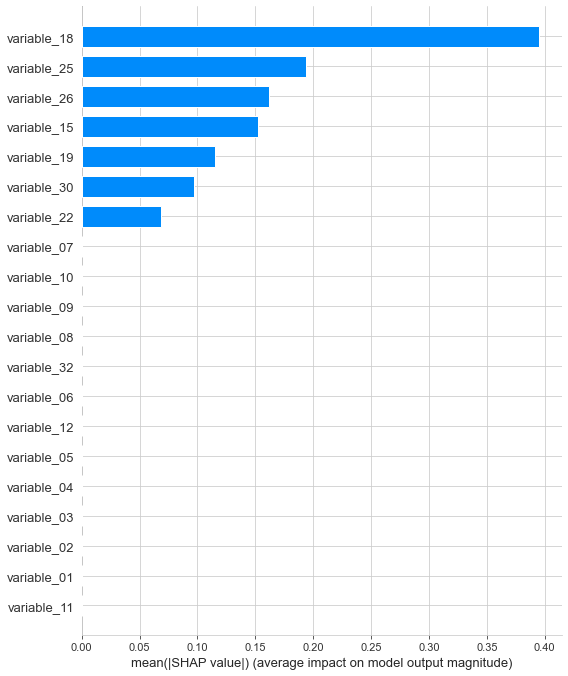

In [89]:
shap.summary_plot(shap_values, X_test, plot_type ="bar") # Test desbalanceado

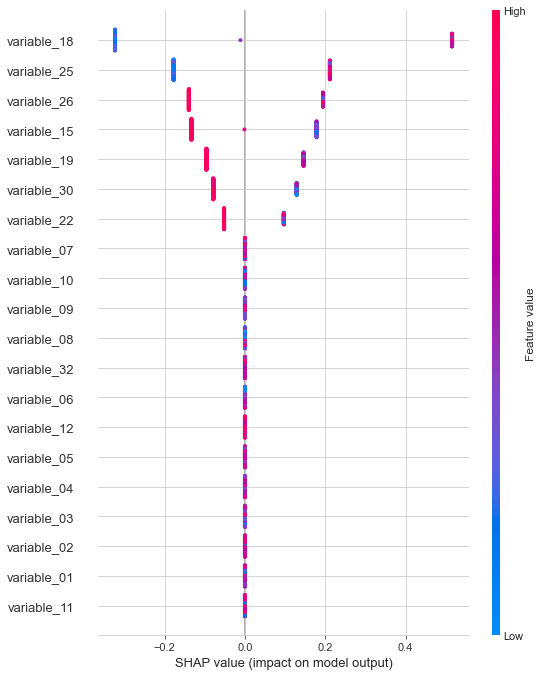

In [91]:
shap.summary_plot(shap_values, X_test)

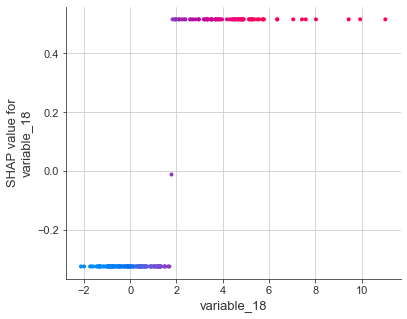

In [94]:
shap.dependence_plot("variable_18", shap_values, X_test) # Test desbalanceado

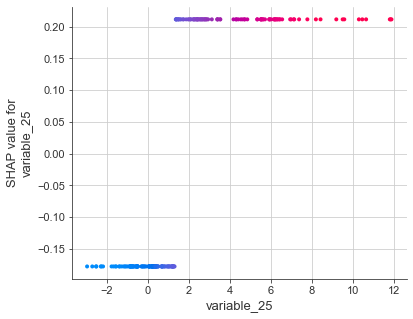

In [95]:
shap.dependence_plot("variable_25", shap_values, X_test) # Test desbalanceado

## Modelo reducido con las variables más relevantes

In [104]:
var_reduc = df_importance_permut[df_importance_permut['importancia']!=0]['predictor']
var_reduc

['variable_15',
 'variable_18',
 'variable_19',
 'variable_22',
 'variable_25',
 'variable_26',
 'variable_30']

In [106]:
X_train_red = X_train[['variable_15',
 'variable_18',
 'variable_19',
 'variable_22',
 'variable_25',
 'variable_26',
 'variable_30']]
X_test_red = X_test[['variable_15',
 'variable_18',
 'variable_19',
 'variable_22',
 'variable_25',
 'variable_26',
 'variable_30']]

In [107]:
X_train_red

,variable_15,variable_18,variable_19,variable_22,variable_25,variable_26,variable_30
101534,0.059200,-0.911065,0.760583,0.881495,1.215502,1.620104,-0.927585
138563,-0.838767,-0.384122,-0.511293,0.375621,0.535901,-1.805610,0.338283
94334,0.591764,0.047591,-0.724262,0.491467,0.139105,1.074319,-0.493501
213233,-6.424372,2.453710,-4.542612,-2.286986,1.835006,-4.855402,-4.694132
262520,0.002589,-1.074666,0.735181,-1.159436,-0.280113,-0.027823,-1.270810
...,...,...,...,...,...,...,...
220551,-9.252307,6.439053,-4.959493,-0.746579,6.047445,-5.615159,-0.753543
17913,-5.429362,0.301369,-2.932895,-1.196101,2.819191,-1.077145,-1.430435
267167,-0.234693,0.145263,1.016746,-0.724240,-2.279927,1.418824,-0.792930
63014,-8.328601,5.612347,-8.789723,-15.939003,6.144821,-23.009003,-10.236786


In [108]:
# Reentrenamiento del model
xgb_model.fit(X_train_red, y_train)

[21:02:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_stimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=7.151565417023671, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
              max_leaves=0, min_child_weight=9, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              n_stimators=500, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=65, ...)

In [109]:
y_pred_red = xgb_model.predict(X_test_red)
predictions_red = [round(value) for value in y_pred_red]

In [110]:
# Reporte de clasificación
print(classification_report(y_test,predictions_red)) 
# y_test la salida real en el test y prediciones son las salidas que predice el modelo

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       101
           1       1.00      0.84      0.91        94

    accuracy                           0.92       195
   macro avg       0.94      0.92      0.92       195
weighted avg       0.93      0.92      0.92       195



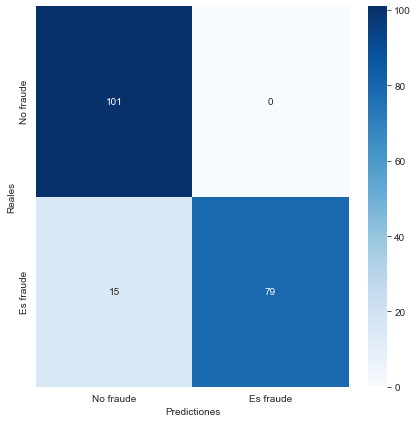

In [111]:
array = confusion_matrix(y_test, predictions_red)
df = pd.DataFrame(array, index = ['No fraude','Es fraude'], columns =['No fraude','Es fraude'])
plt.figure(figsize = (7,7))
sns.heatmap(df, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predictiones')
plt.ylabel('Reales')
plt.show()

In [112]:
roc_auc_red = roc_auc_score(y_test, predictions_red)
roc_auc_red

0.9202127659574468

In [ ]:
# Crear visualización por deciles de probabilidad 
# Ver cómo ordela 
# Heatmap con las variables más importantes por deciles (cual es el comportamiento de las variables por probablidad)